In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
titanic_df = pd.read_csv('train.csv', index_col=0)

In [5]:
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [15]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

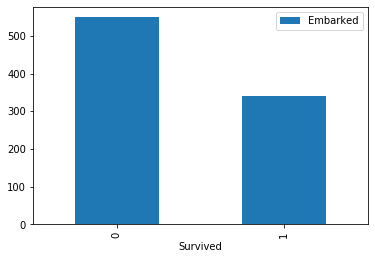

In [14]:
titanic_df[['Embarked', 'Survived']].groupby(['Survived']).count().plot.bar() 

In [9]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class

In [10]:
titanic_df.groupby(['Survived', 'Pclass']).size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [17]:
titanic_df1s = titanic_df.groupby(['Pclass']).mean().loc[1, 'Survived']
titanic_df1s

0.6296296296296297

### Create a bar plot with separete bars for male/female passengers and 1st/2nd/3rd class passengers

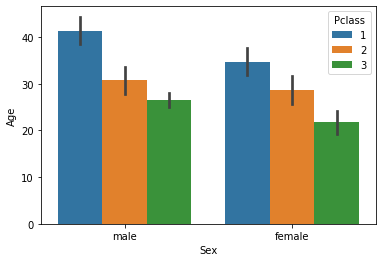

In [8]:

sns.barplot(x='Sex', y='Age', data=titanic_df, hue='Pclass')

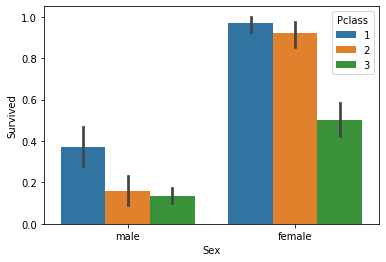

In [20]:
sns.barplot(x='Sex', y='Survived', data=titanic_df, hue='Pclass')

### Create a histogram showing the age distribution of passengers. Compare surviving/non surviving passengers.

C:\Users\maras\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


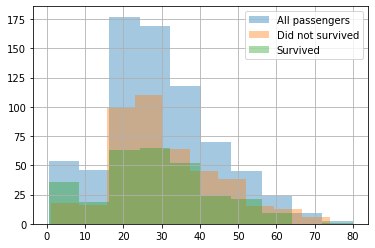

In [23]:
ax1=titanic_df['Age'].hist(alpha=0.4)
ax2=titanic_df[titanic_df['Survived']==0]['Age'].hist(alpha=0.4)
ax3=titanic_df[titanic_df['Survived']==1]['Age'].hist(alpha=0.4)
plt.legend([ax1, ax2, ax3], labels=['All passengers', 'Did not survived', 'Survived'])

### Calculate the average age for survived and drowned passengers

In [11]:
#Average age of all passengers
titanic_df['Age'].mean()


29.69911764705882

In [29]:
#Average age of survived passengers
titanic_df.groupby(['Age']).mean().loc[(1, 'Survived')]

0.7142857142857143

In [30]:
#Average age of drowned passengers
titanic_df.groupby(['Age']).mean().loc[(0, 'Survived')]

KeyError: 0.0

### Replace missing age values by the mean age

In [31]:
mean = titanic_df['Age'].mean()
mean


29.69911764705882

In [32]:
titanic_df["Age"].fillna(mean, inplace= True)

### Create a table counting the number of surviving/dead passengers seperately for 1st/2nd/3rd class and male/female

In [12]:
titanic_df.groupby(['Pclass', 'Survived', 'Sex']).count()

Name  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass Survived Sex                                                           
1      0        female     3    3      3      3       3     3      3         3
                male      77   61     77     77      77    77     56        77
       1        female    91   82     91     91      91    91     78        89
                male      45   40     45     45      45    45     39        45
2      0        female     6    6      6      6       6     6      1         6
                male      91   84     91     91      91    91      2        91
       1        female    70   68     70     70      70    70      9        70
                male      17   15     17     17      17    17      4        17
3      0        female    72   55     72     72      72    72      2        72
                male     300  215    300    300     300   300      4       300
       1        female    72   47     72     72      72    72      4        72
                male      47   38     47     47      47    47      2        47